In [254]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree # Decision tree classifier
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [255]:
# Set seed
np.random.seed(100)

In [256]:
data_file = pd.read_csv("IPLD.csv")
data = pd.DataFrame(data_file)

In [257]:
# Rename columns
data.columns = ['age', 'sex', 'tb', 'db', 'aap', 'sgpaa', 'sgoaa', 'tp', 'alb', 'ag', 'label']

In [258]:
target = data.label

In [259]:
 d = data

In [260]:
d

,age,sex,tb,db,aap,sgpaa,sgoaa,tp,alb,ag,label
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
5,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
6,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
7,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
8,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1
9,57,Male,0.6,0.1,210,51,59,5.9,2.7,0.80,1


In [261]:
# Change sex to boolean so we have all numerical attributes

for i in range(0, len(d)):
    if d.iloc[i,1] == 'Male':
        d.iloc[i,1] = np.int32(1)
    else:
        d.iloc[i,1] = np.int32(0)

In [262]:
#d.iloc[:,1] = d.iloc[:,1].astype('int8')

In [263]:
# Split into test and train data 80/20 split
train_data, test_data = train_test_split(d,test_size=0.2)

In [264]:
# verify that the test and train data are not mixed at all

s1 = set(list(test_data.index))
s2 = set(list(train_data.index))
intersection = s1.intersection(s2)

if len(intersection) != 0:
    print("Error training and test data mixed")
else:
    print("Completed 80/20 split of training and test data")
    print("Data preprocessing complete")
    

Completed 80/20 split of training and test data
Data preprocessing complete


In [265]:
test_data_label = test_data.label
train_data_label = train_data.label

In [266]:
td = train_data.iloc[:,0:10]

In [267]:
td.iloc[:,8] = td.iloc[:,8].astype('float16')

In [268]:
#dot_data = tree.export_graphviz(classifier, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render("ipld.gv")

In [269]:
for i in range(len(td.ag)):
    if type(td.iloc[i,8]) != np.float16:
        print(i)

In [270]:
td.isnull().any()

age      False
sex      False
tb       False
db       False
aap      False
sgpaa    False
sgoaa    False
tp       False
alb      False
ag        True
dtype: bool

In [271]:
# Find missing values
index = td['ag'].index[td['ag'].apply(np.isnan)]
df_index = td.index.values.tolist()
[df_index.index(i) for i in index]

[15, 89, 264, 286]

In [277]:
td.ag.describe()

count    461.00000
mean       0.95282
std        0.33077
min        0.30000
25%        0.70000
50%        1.00000
75%        1.10000
max        2.80000
Name: ag, dtype: float64

In [278]:
# Replace missing values with average for column
td.iloc[[15, 89, 264, 286],9] = 0.952637

In [279]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(td, train_data_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

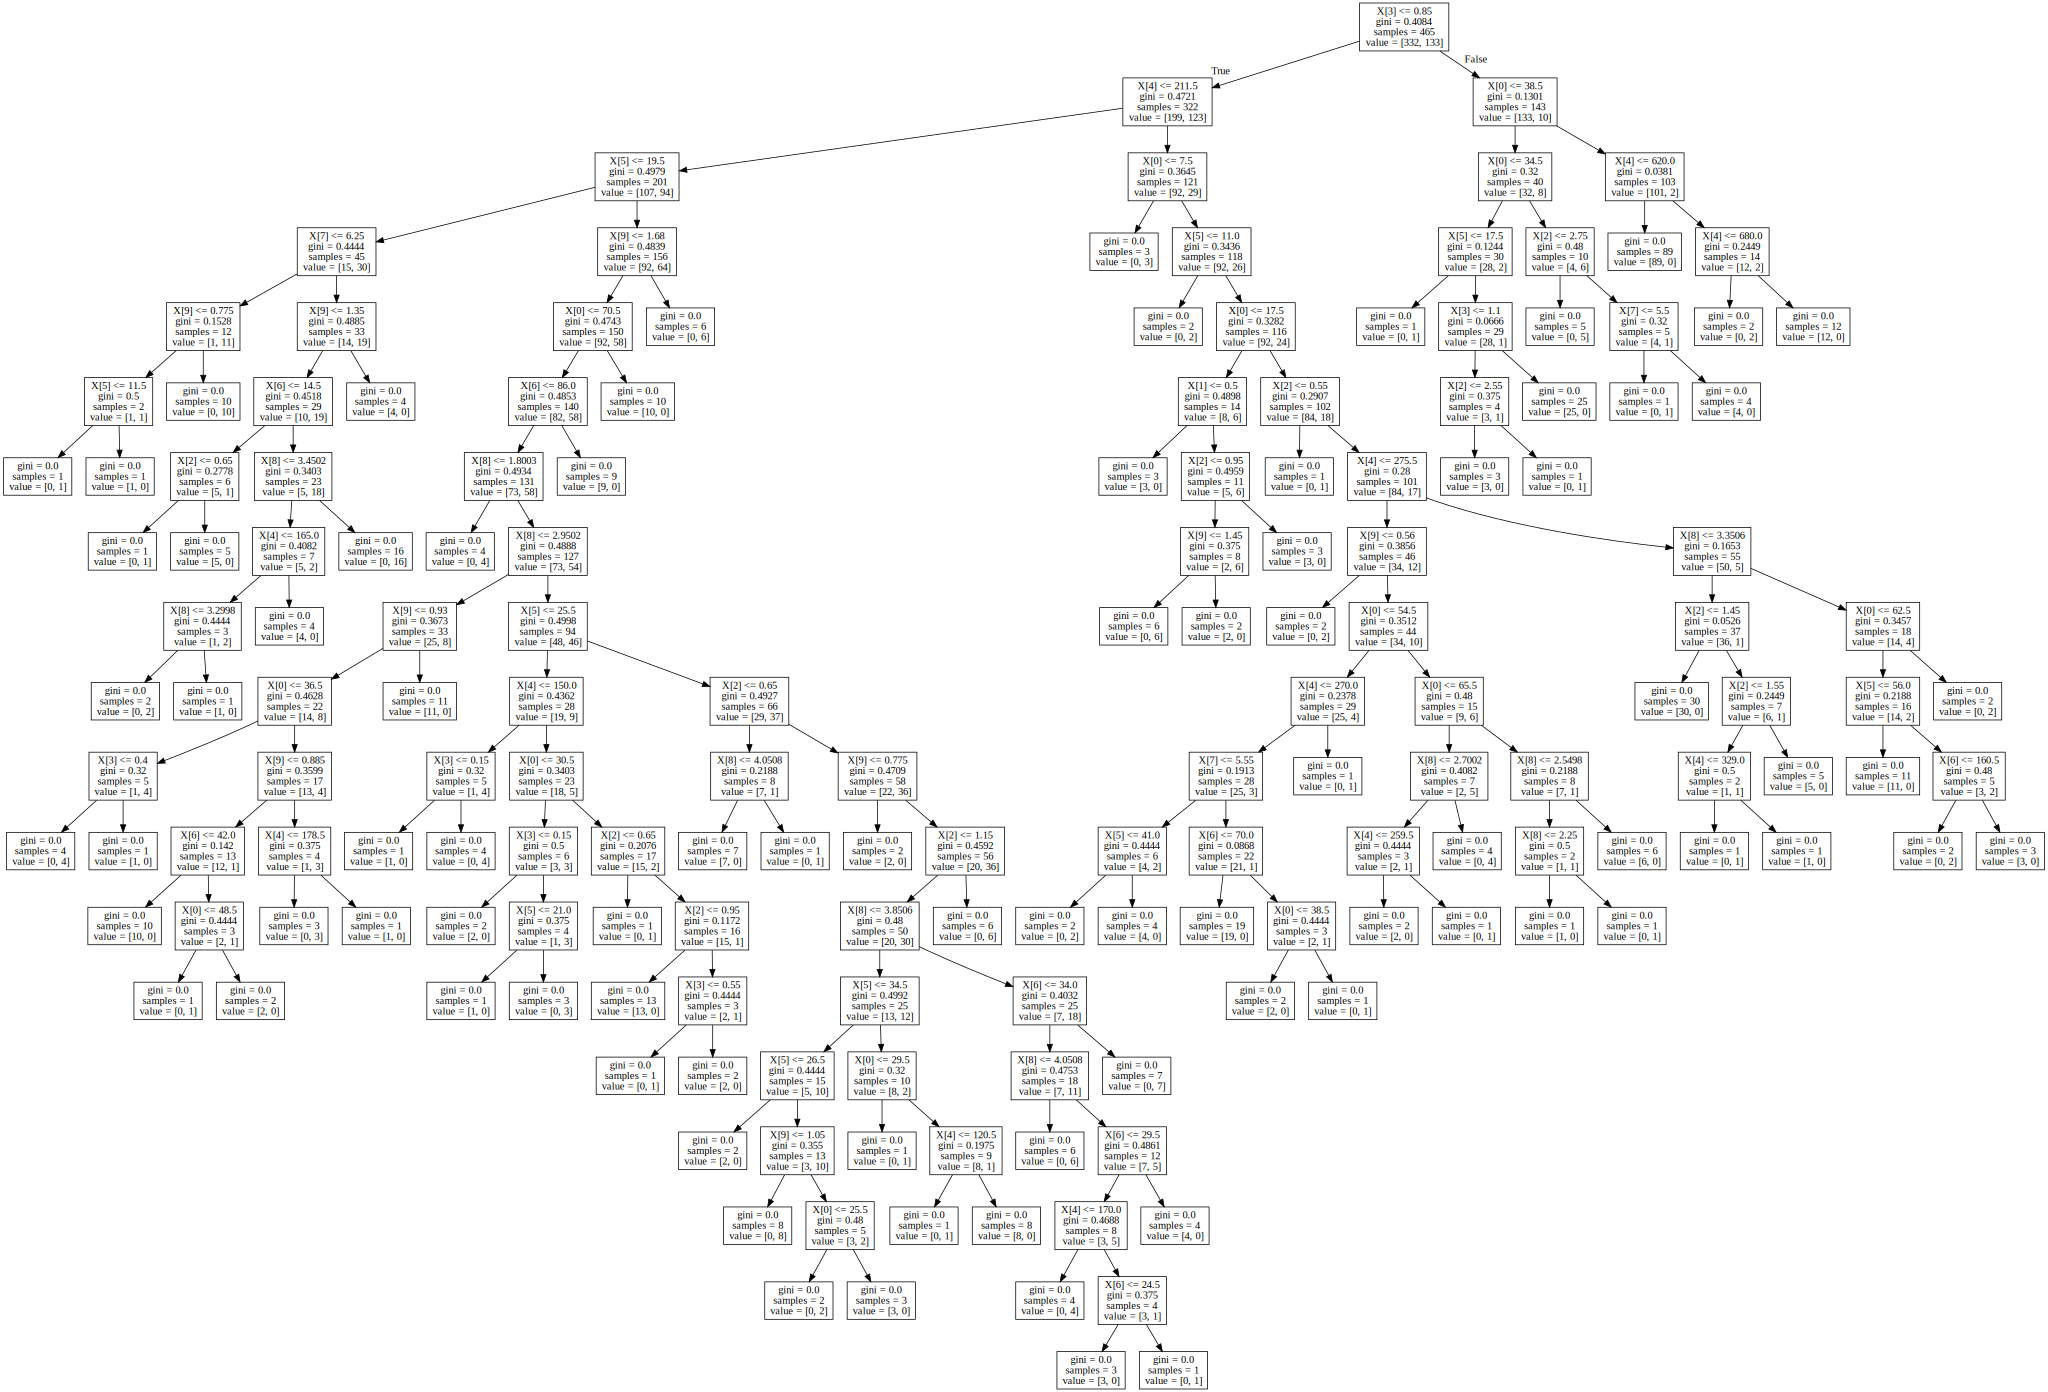

In [280]:
dot_data = tree.export_graphviz(classifier, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("ipld.gv")
graph

In [284]:
classifier.predict(test_data.iloc[:,0:10])

array([1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1])

In [285]:
test_data.iloc[:,0:10]

,age,sex,tb,db,aap,sgpaa,sgoaa,tp,alb,ag
287,50,0,1.0,0.5,239,16,39,7.5,3.7,0.90
391,41,1,7.5,4.3,149,94,92,6.3,3.1,0.90
152,52,1,0.6,0.1,178,26,27,6.5,3.6,1.20
117,32,1,15.9,7.0,280,1350,1600,5.6,2.8,1.00
149,56,1,1.1,0.5,180,30,42,6.9,3.8,1.20
127,58,0,1.7,0.8,1896,61,83,8.0,3.9,0.95
195,60,1,2.0,1.1,664,52,104,6.0,2.1,0.53
511,56,1,1.0,0.3,195,22,28,5.8,2.6,0.80
548,40,0,2.1,1.0,768,74,141,7.8,4.9,1.60
114,50,1,7.3,3.6,1580,88,64,5.6,2.3,0.60


In [286]:
data

,age,sex,tb,db,aap,sgpaa,sgoaa,tp,alb,ag,label
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
5,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1
6,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,1
7,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,2
8,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,1
9,57,1,0.6,0.1,210,51,59,5.9,2.7,0.80,1
